In [25]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn.apionly as sns
import warnings
import datetime
warnings.filterwarnings('ignore')
plt.style.use('ggplot')
%matplotlib inline

In [26]:
def get_clean_data(df_original):
    weekday_dict = {
        0:'Wd', 1:'Wd', 2:'Wd', 3:'Wd', 4:'Wd', 5:'F', 6:'F' 
    }
    
    df = df_original.copy(deep=True)
    df['date'] =  pd.to_datetime(df['datetime'].apply(lambda x: x[:10]), format='%Y-%m-%d')
    df['year'] = df['date'].dt.year
    df['time'] = pd.to_datetime(df['datetime'].apply(lambda x: x[:19])).dt.time
    df['month'] = df['date'].dt.month
    df['day'] = df['date'].dt.day
    df['hour'] = df['datetime'].apply(lambda x: x[11:13]).astype(int)
    df['minute'] = df['datetime'].apply(lambda x: x[14:16]).astype(int)
    df['weekday'] = df['date'].dt.dayofweek
    df['weekday_label'] = df['weekday']
    df.replace({'weekday_label':weekday_dict}, inplace=True)
    df['season'] = np.where(df['month'].isin(list(range(4,10))), 'summer', 'winter')
    df['date_hour'] = df.apply(lambda x: datetime.datetime.combine(x['date'], x['time']), axis=1)
    df.set_index('date_hour', inplace=True)
    df = df[df.index < '2017']
    clean_df = df[['date', 'year', 'month', 'season', 'day','weekday','weekday_label','time', 'hour', 'minute', 'value']]
    clean_df = clean_df[~clean_df.index.duplicated()]
    clean_df['hour_label'] = np.where(clean_df['hour'].isin(np.arange(9,23)), 'Peak', 'off_peak')
    #clean_df['value'] = np.log1p(clean_df['value'])
    clean_df_freq = clean_df.asfreq('H')
    
    return clean_df_freq

In [27]:
sec_res_up_raw = pd.read_csv('2014_2016_training_files/export_EnergíaUtilizadaDeRegulaciónSecundariaSubir_2017-02-22_18-07.csv', 
                        encoding='latin1', delimiter=';')
sec_res_up = get_clean_data(sec_res_up_raw)

In [28]:
#Count <1 values
print('Non-use: %d\nTotal number of hours: %d\nProb: %.4f '%(len(sec_res_up[sec_res_up['value'] < 1]),
                                                               len(sec_res_up),
                                                               len(sec_res_up[sec_res_up['value'] < 1])/len(sec_res_up)))


Non-use: 2766
Total number of hours: 26304
Prob: 0.1052 


In [29]:
no_use_res = sec_res_up[sec_res_up['value'] < 1]

In [30]:
no_use_res['hour'].value_counts()

10.0    240
9.0     198
21.0    196
11.0    170
22.0    166
12.0    166
8.0     160
20.0    157
19.0    152
13.0    147
7.0     113
17.0    113
18.0    112
14.0    103
6.0     102
15.0     98
16.0     81
0.0      64
23.0     60
1.0      38
5.0      37
2.0      32
4.0      31
3.0      30
Name: hour, dtype: int64

In [31]:
no_use_res['hour_label'].value_counts()

Peak        2099
off_peak     667
Name: hour_label, dtype: int64

In [32]:
no_use_res['weekday'].value_counts()

4.0    456
2.0    439
1.0    420
3.0    404
0.0    371
5.0    366
6.0    310
Name: weekday, dtype: int64

In [33]:
no_use_res['weekday_label'].value_counts()

Wd    2090
F      676
Name: weekday_label, dtype: int64

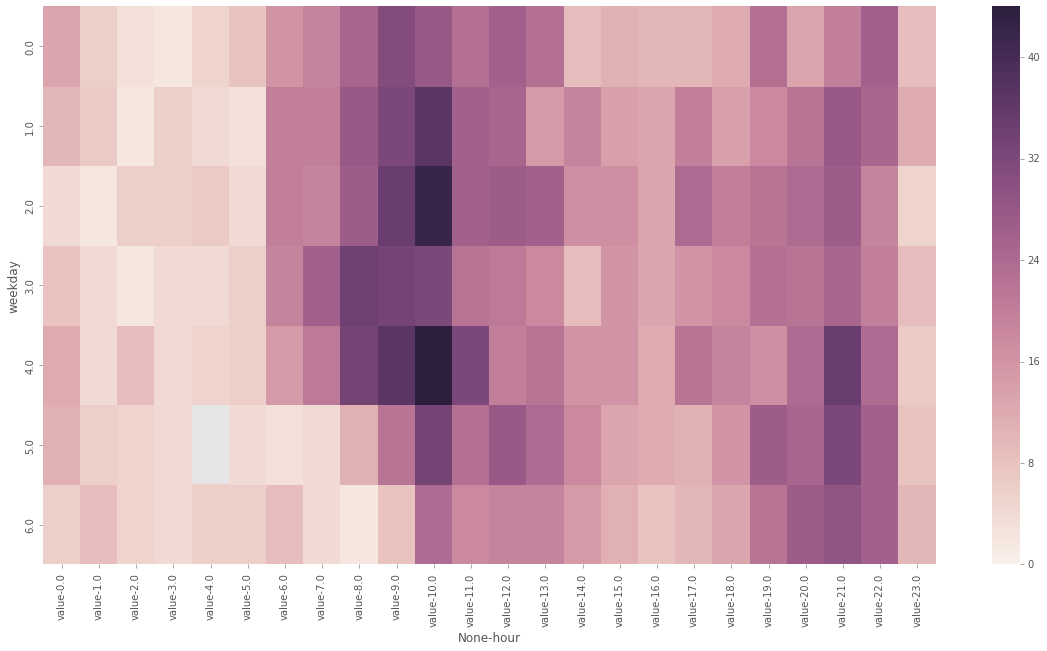

In [34]:
fig, ax = plt.subplots(1,1, figsize=(20,10))
sns.heatmap(no_use_res.groupby(['weekday', 'hour'])[['value']].count().unstack(-1), ax=ax,
            vmin=0, vmax=no_use_res.groupby(['weekday', 'hour'])['value'].count().max());

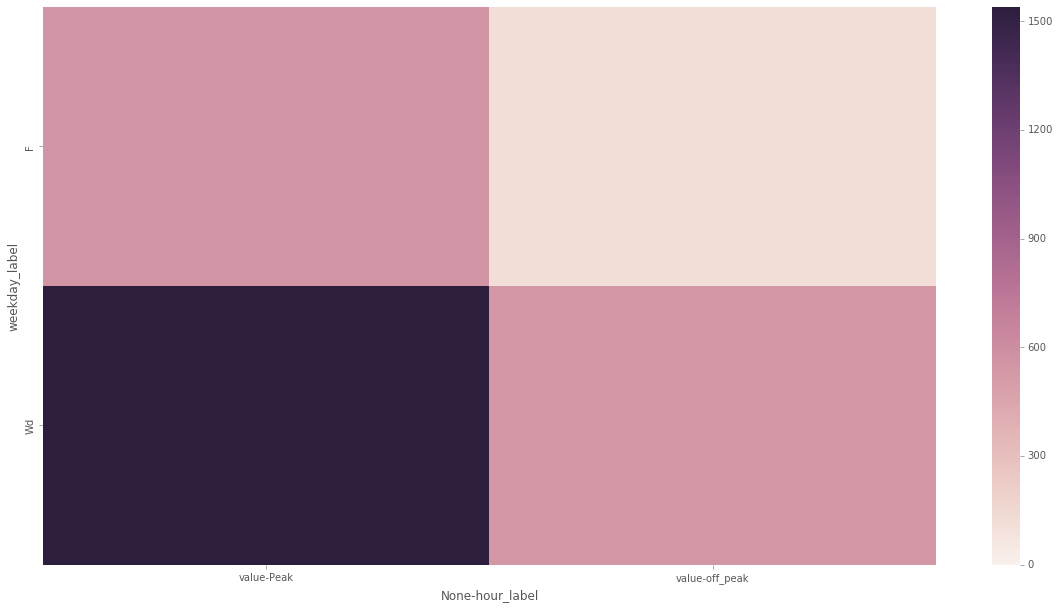

In [35]:
fig, ax = plt.subplots(1,1, figsize=(20,10))
sns.heatmap(no_use_res.groupby(['weekday_label', 'hour_label'])[['value']].count().unstack(-1), ax=ax,
            vmin=0, vmax=no_use_res.groupby(['weekday_label', 'hour_label'])['value'].count().max());